<a href="https://colab.research.google.com/github/anyyaa/data_anomalies_project/blob/main/users_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown --id 1GHIUeCjB5nks1RRHwyDY0RI0Dg73QlpG



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GHIUeCjB5nks1RRHwyDY0RI0Dg73QlpG
From (redirected): https://drive.google.com/uc?id=1GHIUeCjB5nks1RRHwyDY0RI0Dg73QlpG&confirm=t&uuid=7970d5b7-154c-42e9-b678-d4c21447f32c
To: /content/data_2024-10-01.parquet
100% 1.37G/1.37G [00:18<00:00, 76.1MB/s]


In [ ]:
!ls

2024-10-03.parquet  drive  sample_data


In [4]:
import pandas as pd

df = pd.read_parquet('data_2024-10-01.parquet')
print(df.head())

                   ts              ip  page_view_order_number  \
0 2024-10-01 07:05:07  185.169.154.88                       1   
1 2024-10-01 07:05:07  185.169.154.88                       1   
2 2024-10-01 07:05:07  185.169.154.88                       1   
3 2024-10-01 07:05:07   81.23.167.114                       1   
4 2024-10-01 07:05:07     62.32.76.90                       1   

   event_order_number        event  secs  \
0                   5    page_ping     0   
1                   4    page_ping     1   
2                   3  page_scroll     1   
3                   9    page_ping    25   
4                   7    page_ping     2   

                                            url  \
0                                                 
1                                                 
2  https://b4fd7a71f468fc04.ru/3bf34e24e44cd24d   
3                                                 
4                                                 

                                     

Статистика по количеству действий пользователей:


,actions_count
count,9.037000e+03
mean,1.404536e+03
std,1.302762e+05
min,1.000000e+00
50%,9.000000e+00
90%,4.000000e+01
95%,6.100000e+01
99%,1.420000e+02
99.9%,3.396040e+02
max,1.238357e+07


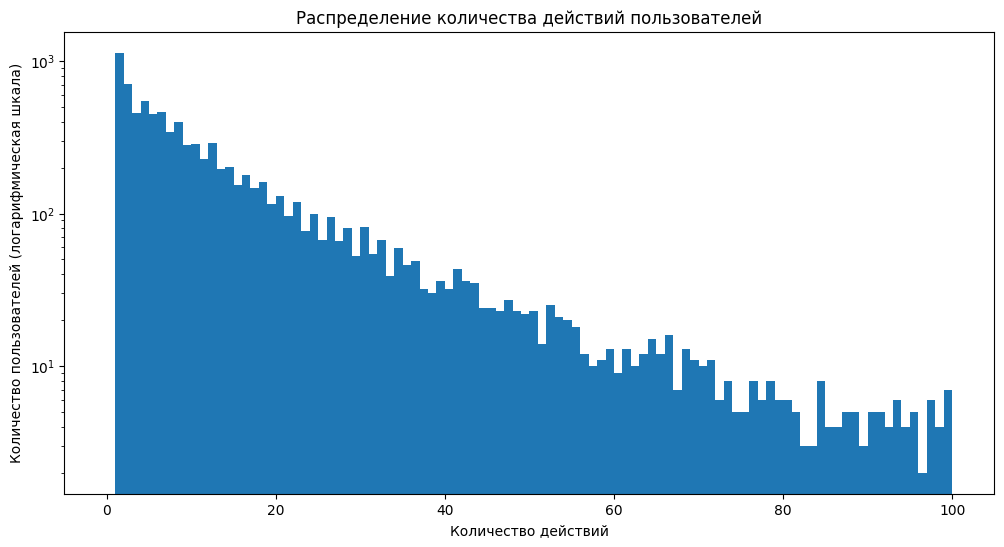

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

user_actions = df.groupby('randPAS_user_passport_id').size().reset_index(name='actions_count')
actions_stats = user_actions['actions_count'].describe(percentiles=[0.5, 0.9, 0.95, 0.99, 0.999])

print("Статистика по количеству действий пользователей:")
display(actions_stats)

plt.figure(figsize=(12, 6))
plt.hist(user_actions['actions_count'], bins=100, range=(0, 100), log=True)
plt.title('Распределение количества действий пользователей')
plt.xlabel('Количество действий')
plt.ylabel('Количество пользователей (логарифмическая шкала)')
plt.show()

In [8]:
anomalous_users = user_actions[user_actions['actions_count'] > 100]
print(f"\nНайдено {len(anomalous_users)} пользователей с более чем 100 действиями:")
display(anomalous_users.sort_values('actions_count', ascending=False).head(20))

ip_activity = df.groupby('ip').size().reset_index(name='requests_count')
ip_stats = ip_activity['requests_count'].describe(percentiles=[0.5, 0.9, 0.95, 0.99, 0.999])

print("\nСтатистика по количеству запросов с IP-адресов:")
display(ip_stats)



Найдено 185 пользователей с более чем 100 действиями:


,randPAS_user_passport_id,actions_count
0,,12383572
3926,J9.Ecg4adyO;II Vo(o754}zX0pWU9,151116
3299,"C0Xz <6d|q:d""4+NmPst[.rGn}SB]D",591
345,"#~18|A!kOs#$%cCeVvl[mV],LX(4<Y",549
6126,"aGL3.;6:R2G<^8(1*j_8x)hL.*a""X0",477
8821,|d])87=_dT`s:FhkD4d`Mo{V/'{s.z,404
7481,"o-'NRGy;[`gg:(\h3J$raud^Z,R.!i",394
8896,"}]HD}#l_/6U=e>8I3q<sYd/(A Z""Q2",368
3121,"A9Bz5'o6oGu::_bmAb?@X?$xRv"";]^",351
2176,"7>1-}o!\?X:LHD4aird8)XBuv04%,9",340



Статистика по количеству запросов с IP-адресов:


,requests_count
count,478603.000000
mean,26.520504
std,448.402735
min,1.000000
50%,11.000000
90%,62.000000
95%,93.000000
99%,190.980000
99.9%,473.000000
max,228756.000000


In [7]:
# Вывод подозрительных IP (более 100 запросов)
suspicious_ips = ip_activity[ip_activity['requests_count'] > 100]
print(f"\nНайдено {len(suspicious_ips)} IP-адресов с более чем 100 запросами:")
display(suspicious_ips.sort_values('requests_count', ascending=False).head(20))



Найдено 20626 IP-адресов с более чем 100 запросами:


,ip,requests_count
306875,66.249.70.38,228756
322555,79.139.147.66,151116
306876,66.249.70.39,124423
306869,66.249.70.32,53879
391587,89.178.214.81,36149
306870,66.249.70.33,20405
306871,66.249.70.34,8047
251797,45.142.211.130,3733
405775,91.209.91.147,3276
306872,66.249.70.35,3021


In [9]:
session_events = df[['randPAS_session_id', 'event_order_number']].dropna()

def check_session_sequence(group):
    expected = 1
    for order in sorted(group['event_order_number'].unique()):
        if order != expected:
            return True
        expected += 1
    return False

anomalous_sessions = session_events.groupby('randPAS_session_id').filter(check_session_sequence)

print(f"\nНайдено {len(anomalous_sessions['randPAS_session_id'].unique())} сессий с нарушенной последовательностью действий:")

if not anomalous_sessions.empty:
    sample_session = anomalous_sessions['randPAS_session_id'].iloc[0]
    print(f"\nПример аномальной сессии {sample_session}:")
    display(df[df['randPAS_session_id'] == sample_session][['ts', 'event_order_number', 'event', 'url']].sort_values('ts'))
else:
    print("Аномальных сессий не обнаружено.")


Найдено 189835 сессий с нарушенной последовательностью действий:

Пример аномальной сессии UYQTIra=#IHtS;IE6h)(K^giZsDO%rd$CGECQ"0kK<:


,ts,event_order_number,event,url
9020820,2024-10-01 06:50:50,1,page_view,https://57580f5dcfabe04b.ru/7992d5dec7f07843
9390773,2024-10-01 06:50:50,1,page_view,https://57580f5dcfabe04b.ru/7992d5dec7f07843
9021185,2024-10-01 06:50:54,2,page_ping,
9391138,2024-10-01 06:50:54,2,page_ping,
9021800,2024-10-01 06:51:01,3,page_ping,
9391753,2024-10-01 06:51:01,3,page_ping,
9023081,2024-10-01 06:51:14,4,page_ping,
9393034,2024-10-01 06:51:14,4,page_ping,
9041925,2024-10-01 06:51:39,5,page_ping,
9403686,2024-10-01 06:51:39,5,page_ping,


In [11]:
if 'randPAS_session_id' in df.columns and 'ts' in df.columns:
    session_durations = df.groupby('randPAS_session_id')['ts'].agg(['min', 'max'])
    session_durations['duration'] = (session_durations['max'] - session_durations['min']).dt.total_seconds() / 60  # в минутах

    print("\nСтатистика по длительности сессий (в минутах):")
    display(session_durations['duration'].describe(percentiles=[0.5, 0.9, 0.95, 0.99, 0.999]))




Статистика по длительности сессий (в минутах):


,duration
count,1.251801e+06
mean,7.484225e+00
std,4.091637e+01
min,0.000000e+00
50%,6.666667e-01
90%,7.366667e+00
95%,2.560000e+01
99%,1.605167e+02
99.9%,6.037700e+02
max,1.439967e+03
